In [1]:
# 2. 필요한 라이브러리 설치
# %pip install -q kaggle

# 3. Kaggle API 설정
# import os

!which python
!pip show torch
import torch
print(torch.version.cuda) 
!echo $PATH
!echo $LD_LIBRARY_PATH

/home/gpu_04/.conda/envs/DL/bin/python
Name: torch
Version: 2.5.1+cu121
Summary: Tensors and Dynamic neural networks in Python with strong GPU acceleration
Home-page: https://pytorch.org/
Author: PyTorch Team
Author-email: packages@pytorch.org
License: BSD-3-Clause
Location: /home/gpu_04/.conda/envs/DL/lib/python3.10/site-packages
Requires: filelock, fsspec, jinja2, networkx, nvidia-cublas-cu12, nvidia-cuda-cupti-cu12, nvidia-cuda-nvrtc-cu12, nvidia-cuda-runtime-cu12, nvidia-cudnn-cu12, nvidia-cufft-cu12, nvidia-curand-cu12, nvidia-cusolver-cu12, nvidia-cusparse-cu12, nvidia-nccl-cu12, nvidia-nvtx-cu12, sympy, triton, typing-extensions
Required-by: torchaudio, torchvision
12.1
/usr/local/cuda-12.2/bin:/usr/local/cuda-12.2/bin:/home/gpu_04/.conda/envs/DL/bin:/opt/anaconda3/condabin:/usr/local/cuda-12.2/bin:/usr/local/cuda-12.2/bin:/home/gpu_04/.conda/envs/DL/bin:/opt/anaconda3/condabin:/home/gpu_04/.vscode-server/cli/servers/Stable-f1a4fb101478ce6ec82fe9627c43efbf9e98c813/server/bin/rem

In [4]:
import torch
print("PyTorch 버전:", torch.__version__)
print("CUDA 사용 가능 여부:", torch.cuda.is_available())
print("현재 디바이스:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "CPU")
print("CUDA 버전:", torch.version.cuda if torch.cuda.is_available() else "None")

PyTorch 버전: 2.5.1+cu121
CUDA 사용 가능 여부: True
현재 디바이스: NVIDIA RTX A6000
CUDA 버전: 12.1


In [4]:
import os
import subprocess
import tensorflow as tf

# Kaggle API 설정
def setup_kaggle():
    kaggle_path = os.path.expanduser("./")
    kaggle_json_path = os.path.join(kaggle_path, "kaggle.json")

    # kaggle.json 파일이 있는지 확인하고 설정
    if not os.path.exists(kaggle_json_path):
        print("Kaggle API 키 파일(kaggle.json)을 ~/.kaggle에 배치해 주세요.")
        print("API 키는 https://www.kaggle.com/account > Create New API Token에서 다운로드할 수 있습니다.")
    else:
        os.makedirs(kaggle_path, exist_ok=True)  # .kaggle 디렉토리 생성
        os.chmod(kaggle_json_path, 0o600)  # kaggle.json 권한 설정
        print("Kaggle API 설정이 완료되었습니다.")

# 데이터셋 다운로드 및 압축 해제
def download_flickr8k():
    data_dir = "/home/gpu_04/jw2020/ImageCaptioning/flickr8k_data"
    os.makedirs(data_dir, exist_ok=True)

    # 다운로드할 경로로 이동
    os.chdir(data_dir)

    # Flickr8k 데이터셋 다운로드
    try:
        subprocess.run(["kaggle", "datasets", "download", "-d", "adityajn105/flickr8k"], check=True)
    except subprocess.CalledProcessError:
        print("Kaggle 데이터셋 다운로드에 실패했습니다. Kaggle API가 제대로 설정되었는지 확인하세요.")
        return None

    # 압축 해제
    try:
        subprocess.run(["unzip", "-q", "flickr8k.zip"], check=True)
        print(f"데이터가 {data_dir}에 다운로드되었습니다.")
    except subprocess.CalledProcessError:
        print("데이터셋 압축 해제에 실패했습니다.")

    return data_dir

# GPU 확인
def check_gpu():
    gpu_devices = tf.config.list_physical_devices('GPU')
    if gpu_devices:
        print(f"사용 가능한 GPU: {len(gpu_devices)}개")
        for gpu in gpu_devices:
            print(f"  - {gpu}")
        print("\nGPU 사용이 가능합니다!")
    else:
        print("GPU가 감지되지 않았습니다.")

# 실행 예시
if __name__ == "__main__":
    # Kaggle 설정
    setup_kaggle()

    # 데이터 다운로드
    data_dir = download_flickr8k()

    # GPU 확인
    check_gpu()

    print("\n모든 설정이 완료되었습니다!")


Kaggle API 키 파일(kaggle.json)을 ~/.kaggle에 배치해 주세요.
API 키는 https://www.kaggle.com/account > Create New API Token에서 다운로드할 수 있습니다.
Dataset URL: https://www.kaggle.com/datasets/adityajn105/flickr8k
License(s): CC0-1.0
flickr8k.zip: Skipping, found more recently modified local copy (use --force to force download)
데이터셋 압축 해제에 실패했습니다.
사용 가능한 GPU: 1개
  - PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')

GPU 사용이 가능합니다!

모든 설정이 완료되었습니다!


replace Images/1000268201_693b08cb0e.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename:  NULL
(EOF or read error, treating as "[N]one" ...)


In [5]:
import pandas as pd

# 캡션 파일 경로
# data_dir = './flickr8k_data'
caption_file = "/home/gpu_04/jw2020/ImageCaptioning/flickr8k_data/captions.txt"

# 텍스트 파일을 데이터프레임으로 불러오기
captions = pd.read_csv(caption_file, sep=',', names=['image', 'caption'], skiprows=1)

# 이미지 파일명과 캡션 정보 분리
captions['image'] = captions['image'].apply(lambda x: x.split('#')[0])

# 샘플 캡션 데이터 확인
print(captions.head())


                       image  \
0  1000268201_693b08cb0e.jpg   
1  1000268201_693b08cb0e.jpg   
2  1000268201_693b08cb0e.jpg   
3  1000268201_693b08cb0e.jpg   
4  1000268201_693b08cb0e.jpg   

                                             caption  
0  A child in a pink dress is climbing up a set o...  
1              A girl going into a wooden building .  
2   A little girl climbing into a wooden playhouse .  
3  A little girl climbing the stairs to her playh...  
4  A little girl in a pink dress going into a woo...  


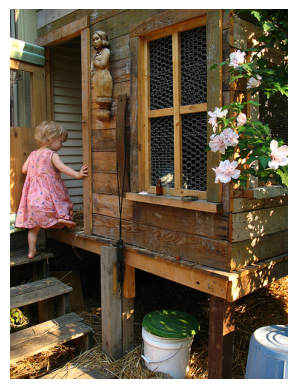

Caption 1: A child in a pink dress is climbing up a set of stairs in an entry way .
Caption 2: A girl going into a wooden building .
Caption 3: A little girl climbing into a wooden playhouse .
Caption 4: A little girl climbing the stairs to her playhouse .
Caption 5: A little girl in a pink dress going into a wooden cabin .


In [6]:
from PIL import Image
import matplotlib.pyplot as plt

def display_image_with_caption(image_name):
    # 이미지 파일 경로
    image_path = f"/home/gpu_04/jw2020/ImageCaptioning/flickr8k_data/Images/{image_name}"

    # 이미지 열기
    img = Image.open(image_path)

    # 해당 이미지의 캡션 불러오기
    image_captions = captions[captions['image'] == image_name]['caption'].values

    # 이미지와 캡션 출력
    plt.imshow(img)
    plt.axis('off')
    plt.show()

    # 캡션 출력
    for i, caption in enumerate(image_captions):
        print(f"Caption {i+1}: {caption}")

# 이미지 파일 중 하나와 캡션을 출력해보기
sample_image = captions['image'].unique()[0]  # 첫 번째 이미지 파일명
display_image_with_caption(sample_image)

In [7]:
import os
os.chdir(os.path.join(os.getcwd(), "./ImageCaptioning/flickr8k_data"))
print("New working directory:", os.getcwd())


New working directory: /home/gpu_04/jw2020/ImageCaptioning/flickr8k_data


In [9]:
import torchvision.transforms as transforms
from PIL import Image
import os
import torch

# GPU 사용 여부 확인
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# 이미지 전처리 함수
def image_preprocessing(image_paths):
    # 전처리 파이프라인 정의
    preprocess = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])

    # RGB 변환 및 전처리 수행
    processed_images = []
    for i, image_path in enumerate(image_paths, 1):  # 인덱스 i로 반복 시작
        image = Image.open(image_path).convert('RGB')  # RGB 변환
        processed_image = preprocess(image)            # 전처리 적용
        processed_images.append(processed_image)

        # 1000개씩 처리 완료 시 진행 상황 출력
        if i % 1000 == 0:
            print(f"{i} images processed...")

    # 이미지를 하나의 텐서로 합치고 GPU로 이동
    processed_images_tensor = torch.stack(processed_images).to(device)
    return processed_images_tensor

# 이미지 경로 설정
image_dir = '/home/gpu_04/jw2020/ImageCaptioning/flickr8k_data/Images/'
all_image_paths = [os.path.join(image_dir, fname) for fname in os.listdir(image_dir) if fname.endswith('.jpg')]

# 이미지 전처리 수행
processed_images = image_preprocessing(all_image_paths)

# 전처리된 이미지 텐서를 저장
output_file = './processed_images.pt'
torch.save(processed_images, output_file)
print(f"Processed images saved to {output_file}")


Using device: cuda
1000 images processed...
2000 images processed...
3000 images processed...
4000 images processed...
5000 images processed...
6000 images processed...
7000 images processed...
8000 images processed...
Processed images saved to ./processed_images.pt


In [11]:
import re
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import csv

def preprocess_selected_captions(captions, max_length=20):
    # 1. 소문자화 및 구두점 제거 함수 정의
    def clean_caption(caption):
        caption = caption.lower()  # 소문자 변환
        caption = re.sub(r'[^\w\s]', '', caption)  # 구두점 제거
        return caption

    # 모든 캡션에 대해 소문자화 및 구두점 제거
    cleaned_captions = [clean_caption(caption) for caption in captions]

    # 2. 단어 사전 구축을 위한 토크나이저 초기화
    tokenizer = Tokenizer(filters='', oov_token=None)  # 불필요한 필터링과 OOV 토큰 제거
    tokenizer.fit_on_texts(cleaned_captions)

    # <sos>와 <eos> 토큰을 사전에 추가하고, 단어 인덱스 갱신
    word_index = tokenizer.word_index
    word_index['<sos>'] = len(word_index) + 1
    word_index['<eos>'] = len(word_index) + 1

    sos_token = word_index['<sos>']
    eos_token = word_index['<eos>']

    # 3. 정수 인덱스로 변환하고 시작/종료 토큰 추가
    caption_sequences = []
    for caption in cleaned_captions:
        indexed_caption = [sos_token] + [word_index[word] for word in caption.split()] + [eos_token]
        caption_sequences.append(indexed_caption)

    # 4. 패딩 처리
    padded_captions = pad_sequences(caption_sequences, maxlen=max_length, padding='post', value=eos_token)

    return padded_captions, word_index

# 캡션 파일 경로
caption_file = '/home/gpu_04/jw2020/ImageCaptioning/flickr8k_data/captions.txt'

# 선택된 캡션 데이터
selected_image_names = set(os.path.basename(path) for path in all_image_paths)
captions = []
with open(caption_file, 'r') as f:
    csv_reader = csv.reader(f)
    next(csv_reader)  # 헤더 건너뛰기
    for row in csv_reader:
        image_name, caption = row[0], row[1]  # 이미지 이름과 캡션 가져오기
        if image_name in selected_image_names:
            captions.append(caption)

# 캡션 전처리            
padded_captions, word_index = preprocess_selected_captions(captions)

# 전처리된 캡션 데이터 저장
output_caption_file = './processed_captions.pt'
torch.save((padded_captions, word_index), output_caption_file)

# 결과 확인
print("전처리된 캡션 (패딩 포함):", padded_captions[:3])
print("단어 사전 크기:", len(word_index))
print("단어 인덱스 예시:", {word: word_index[word] for word in ['dog', '<sos>', '<eos>']})


전처리된 캡션 (패딩 포함): [[8829    1   40    2    1   88  168    5  117   51    1  393   10  390
     2   26 5221  691 8830 8830]
 [8829    1   17  312   62    1  192  115 8830 8830 8830 8830 8830 8830
  8830 8830 8830 8830 8830 8830]
 [8829    1   38   17  117   62    1  192 2429 8830 8830 8830 8830 8830
  8830 8830 8830 8830 8830 8830]]
단어 사전 크기: 8830
단어 인덱스 예시: {'dog': 7, '<sos>': 8829, '<eos>': 8830}


In [8]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.models as models
from torch.utils.data import Dataset, DataLoader, random_split
import psutil
import time

# GPU 사용 설정
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using device: {device}')

# 데이터 불러오기
processed_images = torch.load('./processed_images.pt')  # 전처리된 이미지 텐서 리스트
padded_captions, word_index = torch.load('./processed_captions.pt')  # 전처리된 캡션과 단어 사전
vocab_size = len(word_index) + 1  # 단어 사전 크기 + padding

# ResNet50 모델 로드, FC 레이어 제거
resnet50 = models.resnet50(pretrained=True)
resnet50 = torch.nn.Sequential(*list(resnet50.children())[:-1])  # Feature Extractor로 사용
resnet50 = resnet50.to(device)  # GPU로 이동
resnet50.eval()

# 1. 데이터셋 클래스 정의 (ResNet50을 이용하여 이미지 특징 추출)
class ImageCaptionDataset(Dataset):
    def __init__(self, images, captions, resnet_model):
        self.images = images
        self.captions = captions
        self.resnet_model = resnet_model

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        image = self.images[idx].unsqueeze(0)  # 배치 차원 추가
        with torch.no_grad():
            image_feature = self.resnet_model(image.to(device))  # GPU로 이동
            image_feature = image_feature.view(-1)    # (2048)
        caption = self.captions[idx]
        return image_feature, torch.tensor(caption, dtype=torch.long)


# 데이터셋 분리
dataset = ImageCaptionDataset(processed_images, padded_captions, resnet50)

# 데이터셋 크기 계산
train_size = int(0.8 * len(dataset))  # 80% 학습 데이터
val_size = int(0.1 * len(dataset))    # 10% 검증 데이터
test_size = len(dataset) - train_size - val_size  # 나머지 10% 테스트 데이터

torch.manual_seed(0)   # 항상 일정한 결과를 얻기 위해 시드 설정
train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])

# DataLoader 초기화
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)  # 학습 데이터
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)     # 검증 데이터
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)   # 테스트 데이터

# 데이터셋 크기 출력
print(f"Total Dataset Size: {len(dataset)}")
print(f"Training Dataset Size: {len(train_dataset)}")
print(f"Validation Dataset Size: {len(val_dataset)}")
print(f"Test Dataset Size: {len(test_dataset)}")


# 2. Transformer 기반 이미지 캡셔닝 모델 정의
class ImageCaptioningTransformer(nn.Module):
    def __init__(self, feature_dim, embed_dim, num_heads, hidden_dim, vocab_size, num_layers, max_length):
        super(ImageCaptioningTransformer, self).__init__()
        
        self.feature_embed = nn.Linear(feature_dim, embed_dim)
        self.word_embedding = nn.Embedding(vocab_size, embed_dim)
        self.position_embedding = nn.Embedding(max_length, embed_dim)
        
        decoder_layer = nn.TransformerDecoderLayer(d_model=embed_dim, nhead=num_heads, dim_feedforward=hidden_dim)
        self.transformer_decoder = nn.TransformerDecoder(decoder_layer, num_layers=num_layers)
        
        self.fc = nn.Linear(embed_dim, vocab_size)

    def forward(self, image_features, captions):
        batch_size, seq_len = captions.size()
        
        # 이미지 특징 임베딩 (2048 차원 -> embed_dim 차원)
        image_features = self.feature_embed(image_features).unsqueeze(1)  # (batch_size, 1, embed_dim)
        
        # 캡션 임베딩 및 위치 임베딩
        captions_embed = self.word_embedding(captions)  # (batch_size, seq_len, embed_dim)
        positions = torch.arange(0, seq_len).unsqueeze(0).expand(batch_size, seq_len).to(captions.device)
        captions_embed += self.position_embedding(positions)

        # Transformer 디코더에 이미지 특징과 마스크를 입력
        tgt_mask = self.generate_square_subsequent_mask(seq_len).to(captions.device)
        transformer_out = self.transformer_decoder(tgt=captions_embed.permute(1, 0, 2), 
                                                   memory=image_features.permute(1, 0, 2),
                                                   tgt_mask=tgt_mask)
        
        outputs = self.fc(transformer_out.permute(1, 0, 2))
        return outputs

    def generate_square_subsequent_mask(self, sz):
        mask = torch.triu(torch.ones(sz, sz), 1)
        mask = mask.masked_fill(mask == 1, float('-inf'))
        return mask

# 3. 모델 초기화 및 학습 설정
feature_dim = 2048  # ResNet50의 출력 차원
embed_dim = 128
num_heads = 4
hidden_dim = 512
num_layers = 2
# max_length = padded_captions.shape[1]
max_length = 20
learning_rate = 0.001

model = ImageCaptioningTransformer(feature_dim, embed_dim, num_heads, hidden_dim, vocab_size, num_layers, max_length)
model = model.to(device)  # GPU로 이동
criterion = nn.CrossEntropyLoss(ignore_index=0)
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# GPU 모니터링 함수
def log_gpu_usage():
    if torch.cuda.is_available():
        gpu_memory = torch.cuda.memory_allocated(device) / (1024 ** 2)  # MB 단위
        gpu_max_memory = torch.cuda.max_memory_allocated(device) / (1024 ** 2)  # MB 단위
        gpu_load = torch.cuda.memory_reserved(device) / (1024 ** 2)  # 현재 예약된 메모리
        # print(f"GPU Memory Usage: {gpu_memory:.2f} MB, Max Memory: {gpu_max_memory:.2f} MB, Reserved: {gpu_load:.2f} MB")
        return f"GPU Memory Usage: {gpu_memory:.2f} MB, Max Memory: {gpu_max_memory:.2f} MB, Reserved: {gpu_load:.2f} MB"
    else:
        print("No GPU available.")

Using device: cuda


/tmp/ipykernel_1761373/3595043650.py:14: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  processed_images = torch.load('./processed_images.pt')  # 전처리된 이미지 텐서 리스트
/tmp/ipykern

Total Dataset Size: 8091
Training Dataset Size: 6472
Validation Dataset Size: 809
Test Dataset Size: 810


In [12]:
import logging
import time
import torch

# 로깅 설정
logging.basicConfig(
    filename='training.log',  # 로그 파일 이름
    level=logging.INFO,  # 로그 수준
    format='%(asctime)s - %(levelname)s - %(message)s'  # 로그 포맷
)
logger = logging.getLogger()

def train_model(
    model, 
    train_loader, 
    val_loader, 
    num_epochs, 
    start_epoch=0, 
    loss_history=None, 
    accuracy_history=None, 
    val_loss_history=None, 
    val_accuracy_history=None
):
    """
    학습 함수 (Validation 포함)
    
    Args:
        model: 학습할 모델
        train_loader: DataLoader 객체 (학습 데이터)
        val_loader: DataLoader 객체 (검증 데이터)
        num_epochs: 총 에폭 수
        start_epoch: 학습 시작 에폭 (기본값: 0)
        loss_history: 이전 손실 기록 리스트 (기본값: None)
        accuracy_history: 이전 정확도 기록 리스트 (기본값: None)
        val_loss_history: 이전 Validation 손실 기록 리스트 (기본값: None)
        val_accuracy_history: 이전 Validation 정확도 기록 리스트 (기본값: None)
    
    Returns:
        loss_history: 업데이트된 학습 손실 기록 리스트
        accuracy_history: 업데이트된 학습 정확도 기록 리스트
        val_loss_history: 업데이트된 Validation 손실 기록 리스트
        val_accuracy_history: 업데이트된 Validation 정확도 기록 리스트
    """
    model.train()
    
    # 이전 기록이 없으면 빈 리스트로 초기화
    if loss_history is None:
        loss_history = []
    if accuracy_history is None:
        accuracy_history = []
    if val_loss_history is None:
        val_loss_history = []
    if val_accuracy_history is None:
        val_accuracy_history = []

    for epoch in range(start_epoch, num_epochs):
        # Training Metrics
        total_loss = 0
        correct_predictions = 0
        total_predictions = 0
        epoch_start = time.time()

        for image_features, captions in train_loader:
            image_features = image_features.to(device)
            captions = captions.to(device)
            
            outputs = model(image_features, captions[:, :-1])  # (batch_size, seq_len, vocab_size)
            loss = criterion(outputs.view(-1, vocab_size), captions[:, 1:].reshape(-1))
            
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            total_loss += loss.item()
            
            # 정확도 계산
            predicted_tokens = outputs.argmax(-1)  # (batch_size, seq_len)
            correct_predictions += (predicted_tokens == captions[:, 1:]).sum().item()
            total_predictions += captions[:, 1:].numel()  # 총 단어 개수

        # 에폭 평균 손실 및 정확도 계산 (Training)
        avg_loss = total_loss / len(train_loader)
        accuracy = correct_predictions / total_predictions

        # 결과 저장
        loss_history.append(avg_loss)
        accuracy_history.append(accuracy)

        # Validation 평가
        val_loss, val_accuracy = evaluate_model(model, val_loader)
        val_loss_history.append(val_loss)
        val_accuracy_history.append(val_accuracy)

        epoch_end = time.time()
        # 로그 메시지 출력
        log_message = (f"Epoch [{epoch+1}/{num_epochs}], "
                       f"Train Loss: {avg_loss:.4f}, Train Acc: {accuracy:.4f}, "
                       f"Val Loss: {val_loss:.4f}, Val Acc: {val_accuracy:.4f}, "
                       f"Time: {epoch_end - epoch_start:.2f}s")
        logger.info(log_message)

        # GPU 사용량 로깅
        gpu_usage = log_gpu_usage()
        logger.info(gpu_usage)
        # print(f"Epoch [{epoch+1}/{num_epochs}], "
        #       f"Train Loss: {avg_loss:.4f}, Train Acc: {accuracy:.4f}, "
        #       f"Val Loss: {val_loss:.4f}, Val Acc: {val_accuracy:.4f}, "
        #       f"Time: {epoch_end - epoch_start:.2f}s")
        
        # # GPU 사용량 출력
        # log_gpu_usage()
        
        # !학습 Checkpoint 저장 (임시 - 50 단위로)---
        if (epoch + 1) % 50 == 0:
            checkpoint = {
                'epoch': num_epochs,
                'model_state_dict': model.state_dict(),  # 모델 가중치
                'optimizer_state_dict': optimizer.state_dict(),  # Optimizer 상태
                'train_loss_history': loss_history,  # 학습 손실 기록
                'val_loss_history': val_loss_history,  # 검증 손실 기록
                'train_acc_history': accuracy_history,  # 학습 정확도 기록
                'val_acc_history': val_accuracy_history  # 검증 정확도 기록
            }
            file_name = f'check/checkpoint{epoch+1}_flickr8k_imgcap.pth'
            torch.save(checkpoint, file_name)
            print(f"Checkpoint saved successfully as {file_name}!")
        #!----

    return loss_history, accuracy_history, val_loss_history, val_accuracy_history

# validation evaluation 함수
def evaluate_model(model, val_loader):
    """
    Validation 평가 함수
    
    Args:
        model: 평가할 모델
        val_loader: 검증용 DataLoader 객체
    
    Returns:
        val_loss: 평균 Validation 손실
        val_accuracy: Validation 정확도
    """
    model.eval()
    total_loss = 0
    correct_predictions = 0
    total_predictions = 0
    
    with torch.no_grad():
        for image_features, captions in val_loader:
            image_features = image_features.to(device)
            captions = captions.to(device)
            
            outputs = model(image_features, captions[:, :-1])  # (batch_size, seq_len, vocab_size)
            loss = criterion(outputs.view(-1, vocab_size), captions[:, 1:].reshape(-1))
            total_loss += loss.item()
            
            # 정확도 계산
            predicted_tokens = outputs.argmax(-1)  # (batch_size, seq_len)
            correct_predictions += (predicted_tokens == captions[:, 1:]).sum().item()
            total_predictions += captions[:, 1:].numel()  # 총 단어 개수

    # 평균 Loss 및 Accuracy 계산
    val_loss = total_loss / len(val_loader)
    val_accuracy = correct_predictions / total_predictions

    model.train()  # 학습 모드로 복구
    return val_loss, val_accuracy


In [ ]:
# 학습 실행
num_epochs = 500
loss_history, accuracy_history, val_loss_history, val_accuracy_history = train_model(model, train_loader, val_loader, num_epochs)

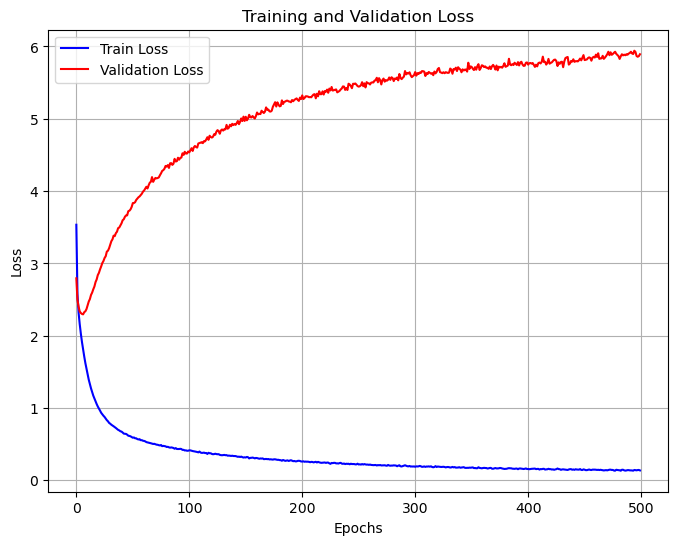

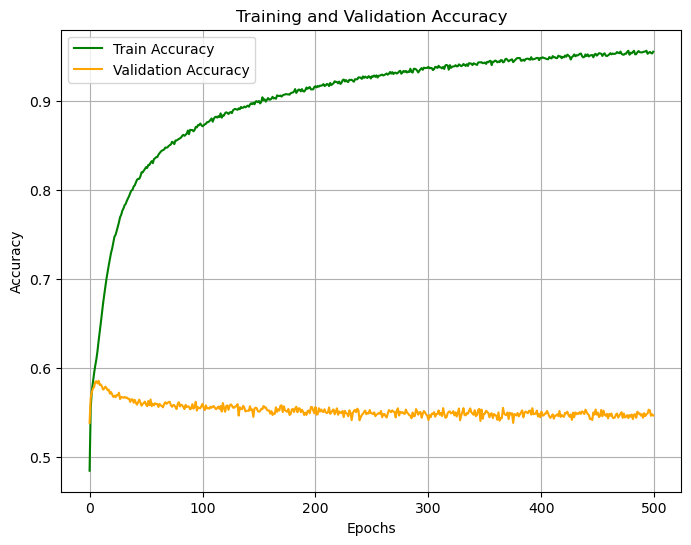

In [13]:
import matplotlib.pyplot as plt

# Loss 그래프
plt.figure(figsize=(8, 6))
plt.plot(loss_history, label='Train Loss', color='blue')
plt.plot(val_loss_history, label='Validation Loss', color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

# Accuracy 그래프
plt.figure(figsize=(8, 6))
plt.plot(accuracy_history, label='Train Accuracy', color='green')
plt.plot(val_accuracy_history, label='Validation Accuracy', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [15]:
# print top 5 of validation loss and accuracy and their indices
val_loss_history_tensor = torch.tensor(val_loss_history)
val_accuracy_history_tensor = torch.tensor(val_accuracy_history)
top_val_loss, top_val_loss_indices = torch.topk(val_loss_history_tensor, 5, largest=False)
top_val_accuracy, top_val_accuracy_indices = torch.topk(val_accuracy_history_tensor, 5, largest=True)
print("Top 5 Validation Loss:", top_val_loss, top_val_loss_indices)
print("Top 5 Validation Accuracy:", top_val_accuracy, top_val_accuracy_indices)

Top 5 Validation Loss: tensor([2.2956, 2.3009, 2.3140, 2.3255, 2.3358]) tensor([6, 5, 4, 7, 3])
Top 5 Validation Accuracy: tensor([0.5852, 0.5847, 0.5840, 0.5823, 0.5810]) tensor([ 8,  6,  5,  7, 10])


## 학습된 모델 저장 / epoch 늘려 이어서 학습

In [26]:
# 학습된 모델의 가중치 저장
torch.save(model.state_dict(), 'flickr8k_ImgCap_50epoch.pth')
print("Model saved successfully!")

Model saved successfully!


In [ ]:
# 학습 Checkpoint 저장
checkpoint = {
    'epoch': num_epochs,
    'model_state_dict': model.state_dict(),  # 모델 가중치
    'optimizer_state_dict': optimizer.state_dict(),  # Optimizer 상태
    'train_loss_history': loss_history,      # history
    'val_loss_history': val_loss_history, 
    'train_acc_history': accuracy_history,
    'val_acc_history': val_accuracy_history 
}
file_name = 'checkpoint50_flickr8k_imgcap.pth'
torch.save(checkpoint, file_name)
print(f"Checkpoint saved successfully as {file_name}!")

Checkpoint saved successfully!


In [11]:
import torch
# 체크포인트 불러오기
checkpoint = torch.load('/home/gpu_04/jw2020/ImageCaptioning/flickr8k_data/check/checkpoint500_flickr8k_imgcap.pth')
model.load_state_dict(checkpoint['model_state_dict'])  # model weight
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])  # Optimizer
start_epoch = checkpoint['epoch']   # epoch number
loss_history = checkpoint['train_loss_history'] 
accuracy_history = checkpoint['train_acc_history'] 
val_loss_history = checkpoint['val_loss_history']  
val_accuracy_history = checkpoint['val_acc_history'] 

print(f"Checkpoint loaded. Starting from epoch {start_epoch + 1}")


Checkpoint loaded. Starting from epoch 501


/tmp/ipykernel_1761373/2748179887.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load('/home/gpu_04/jw2020/ImageCaptioning/flickr8k_data/checkpoint50

In [ ]:
# 이어서 학습 수행
num_epochs = 100  # 총 에폭 수
loss_history, accuracy_history, val_loss_history, val_accuracy_history = train_model(
    model, 
    train_loader,
    val_loader,
    num_epochs, 
    start_epoch=start_epoch,  # 이어서 학습 시작
    loss_history=loss_history,  # 기존 history들 가져와 업데이트
    accuracy_history=accuracy_history,
    val_loss_history=val_loss_history, 
    val_accuracy_history=val_accuracy_history 
)

Epoch [51/100], Loss: 0.6864, Accuracy: 0.8021, Time: 44.93s
GPU Memory Usage: 9632.02 MB, Max Memory: 14316.47 MB, Reserved: 18666.00 MB
Epoch [52/100], Loss: 0.6853, Accuracy: 0.8031, Time: 44.97s
GPU Memory Usage: 9632.02 MB, Max Memory: 14316.47 MB, Reserved: 18666.00 MB
Epoch [53/100], Loss: 0.6795, Accuracy: 0.8046, Time: 44.98s
GPU Memory Usage: 9632.02 MB, Max Memory: 14316.47 MB, Reserved: 18666.00 MB
Epoch [54/100], Loss: 0.6708, Accuracy: 0.8063, Time: 44.53s
GPU Memory Usage: 9632.02 MB, Max Memory: 14316.47 MB, Reserved: 18666.00 MB
Epoch [55/100], Loss: 0.6651, Accuracy: 0.8080, Time: 43.45s
GPU Memory Usage: 9632.02 MB, Max Memory: 14316.47 MB, Reserved: 18666.00 MB
Epoch [56/100], Loss: 0.6599, Accuracy: 0.8089, Time: 44.47s
GPU Memory Usage: 9632.02 MB, Max Memory: 14316.47 MB, Reserved: 18666.00 MB
Epoch [57/100], Loss: 0.6544, Accuracy: 0.8103, Time: 43.78s
GPU Memory Usage: 9632.02 MB, Max Memory: 14316.47 MB, Reserved: 18666.00 MB
Epoch [58/100], Loss: 0.6535, Accu

## 학습된 모델 평가 및 예시 실행 파트

Generated Caption: <sos> a guy skateboarding on midair <eos>

True Captions:


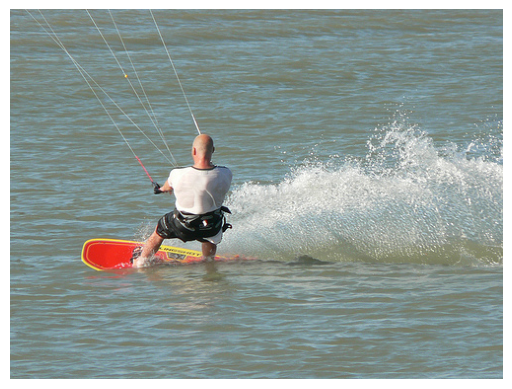

Caption 1: A man holding onto ropes while boogie boarding .
Caption 2: A man holds onto ropes and is pulled through the water on his ski .
Caption 3: A man rides a wakeboard attached to a parachute .
Caption 4: A man windsurfing .
Caption 5: The man is waterskiing .


In [16]:
import torch
import torch.nn.functional as F
from PIL import Image
import torchvision.transforms as transforms

# 이미지 전처리 파이프라인
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# 시작 토큰과 종료 토큰 설정
sos_token = word_index['<sos>']
eos_token = word_index['<eos>']
max_length = 20  # 생성할 캡션의 최대 길이

# 모델을 평가 모드로 설정
model.eval()

def generate_caption(model, image, resnet_model, word_index, max_length=20):
    # 이미지 전처리
    image = transform(image).unsqueeze(0)  # (1, 3, 224, 224)
    image = image.to(device)  # 이미지를 GPU로 이동
    
    # ResNet으로 특징 추출
    with torch.no_grad():
        image_feature = resnet_model(image)  # (1, 2048, 1, 1)
        image_feature = image_feature.view(1, -1)  # (1, 2048)
        image_feature = image_feature.to(device)  # 특징도 GPU 상에 위치

    # Transformer 디코더에 사용할 시퀀스 초기화
    caption_indices = [sos_token]
    
    for _ in range(max_length):
        # 현재 캡션 텐서를 GPU로 이동
        caption_tensor = torch.tensor(caption_indices).unsqueeze(0).to(device)  # (1, seq_len)
        
        # Transformer로 다음 단어 예측
        with torch.no_grad():
            output = model(image_feature, caption_tensor)  # (1, seq_len, vocab_size)
            output = output[:, -1, :]  # 가장 마지막 시퀀스의 예측 결과만 사용
            predicted_token = output.argmax(1).item()  # 확률이 가장 높은 토큰 선택

        # 예측된 단어를 캡션 인덱스에 추가
        caption_indices.append(predicted_token) 
        
        # 예측된 단어가 종료 토큰이면 캡션 생성 중지
        if predicted_token == eos_token:
            break

    # 인덱스 -> 단어로 변환하여 최종 캡션 생성
    index_word = {index: word for word, index in word_index.items()}
    caption = ' '.join([index_word[idx] for idx in caption_indices if idx in index_word])

    return caption

# 테스트할 이미지 로드 및 캡션 생성
test_image_path = './Images/49553964_cee950f3ba.jpg'  # 테스트 이미지 경로 지정
test_image_name = '49553964_cee950f3ba.jpg'
test_image = Image.open(test_image_path).convert('RGB')  # RGB 모드로 변환

generated_caption = generate_caption(model, test_image, resnet50, word_index, max_length=max_length)
print("Generated Caption:", generated_caption)

print("\nTrue Captions:")
display_image_with_caption(test_image_name)